In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

## Data clean-up

In [2]:
# import excel data
members_data = pd.read_excel(r'Zendaya vs Emma Watson(1-19).xlsx')
alumni_data = pd.read_excel(r'Zendaya vs Emma Watson - Alumni(1-27).xlsx')

# remove unnecessary data
members_data = members_data.drop(['Email', 'Name', 'Last modified time', 'ID'], axis=1)
alumni_data = alumni_data.drop(['Email', 'Name', 'Last modified time', 'ID'], axis=1)

# add column to identify data cohort
members_data['Cohort'] = 'Members'
alumni_data['Cohort'] = 'Alumni'

#print(members_data)
#print(alumni_data)

In [3]:
# merge into a single dataframe
df = pd.concat([members_data, alumni_data], ignore_index=True)

# replace start and completion time with response time calculated column
df['Response time'] = df['Completion time'] - df['Start time']
df = df.drop(['Completion time', 'Start time'], axis=1)
df['Response time'] = df['Response time'].dt.seconds

# correct forms response typo
df = df.replace('Zendeya', 'Zendaya')

#print(df)
print(df.head())

  Zendaya or Emma Watson? Are you attracted to...   Cohort  Response time
0                 Zendaya                    Both  Members             43
1                 Zendaya                   Women  Members             13
2             Emma Watson                    Both  Members             15
3                 Zendaya                    Both  Members             14
4                 Zendaya                     Men  Members             48


## Data analysis

### General trends

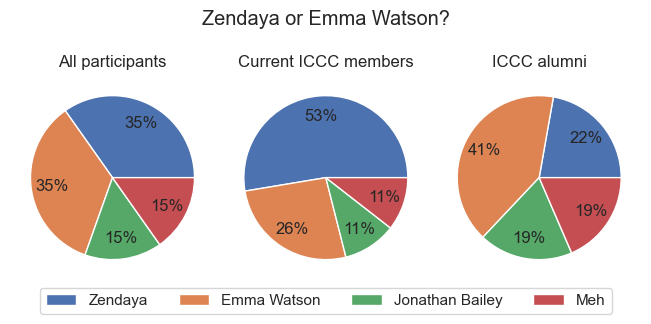

In [4]:
# set custom order for categorical data
order = ['Zendaya', 'Emma Watson', 'Jonathan Bailey', 'Meh']

# setup figure objects
fig, axs = plt.subplots(1, 3, constrained_layout=True)

# plot data
(df.groupby(['Zendaya or Emma Watson?']).size().loc[order]
 .plot(kind='pie', autopct='%1.f%%', labels=None, title='All participants', pctdistance=0.75, ax=axs[0]))

(df[df['Cohort'] == 'Members'].groupby(['Zendaya or Emma Watson?']).size().loc[order]
 .plot(kind='pie', autopct='%1.f%%', labels=None, title='Current ICCC members', pctdistance=0.75, ax=axs[1]))

(df[df['Cohort'] == 'Alumni'].groupby(['Zendaya or Emma Watson?']).size().loc[order]
 .plot(kind='pie', autopct='%1.f%%', labels=None, title='ICCC alumni', pctdistance=0.75, ax=axs[2]))

# format legend
fig.legend(order, ncol=4, loc='lower center', bbox_to_anchor=(0.5,0.2))

# add title
fig.suptitle('Zendaya or Emma Watson?', y=0.85)

# save figure
fig.savefig('outputs/overall_results', bbox_inches='tight')

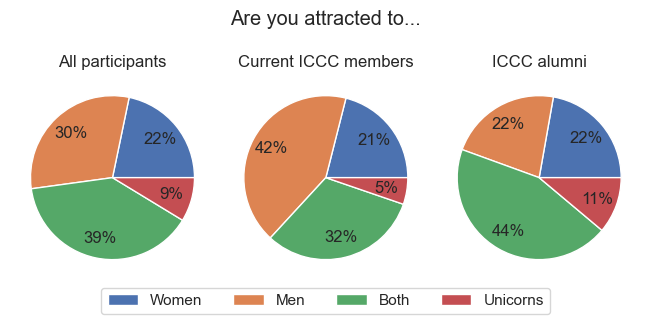

In [5]:
# set custom order for categorical data
order = ['Women', 'Men', 'Both', 'Unicorns']

# setup figure objects
fig, axs = plt.subplots(1, 3, constrained_layout=True)

# plot data
(df.groupby(['Are you attracted to...']).size().loc[order]
 .plot(kind='pie', autopct='%1.f%%', labels=None, title='All participants', pctdistance=0.75, ax=axs[0]))

(df[df['Cohort'] == 'Members'].groupby(['Are you attracted to...']).size().loc[order]
 .plot(kind='pie', autopct='%1.f%%', labels=None, title='Current ICCC members', pctdistance=0.75, ax=axs[1]))

(df[df['Cohort'] == 'Alumni'].groupby(['Are you attracted to...']).size().loc[order]
 .plot(kind='pie', autopct='%1.f%%', labels=None, title='ICCC alumni', pctdistance=0.75, ax=axs[2]))

# format legend
fig.legend(order, ncol=4, loc='lower center', bbox_to_anchor=(0.5,0.2))

# add title
fig.suptitle('Are you attracted to...', y=0.85)

# save figure
fig.savefig('outputs/overall_attracted_to', bbox_inches='tight')

C:\Users\maria\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


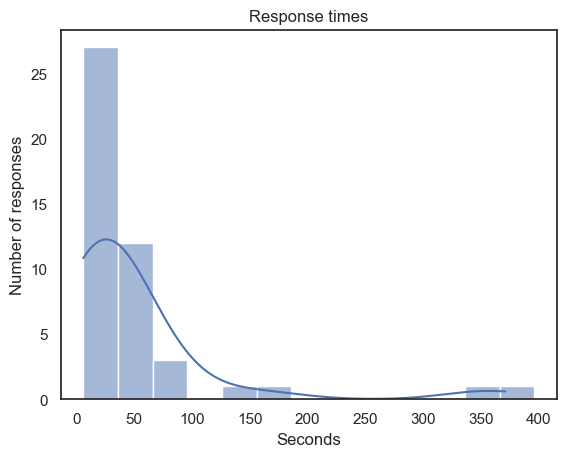

In [12]:
# response time
# plot histogram
fig = plt.figure()
sns.histplot(x=df['Response time'], binwidth=30, kde=True)
plt.xlabel('Seconds')
plt.ylabel('Number of responses')
plt.title('Response times')

# save figure
fig.savefig('outputs/overall_response_time', bbox_inches='tight')

### Answers to "Zendaya or Emma Watson"

#### Effect of sexual preference

In [14]:
def tabulate_data(df, col1, col2):
    # crosstab dataframe
    df_temp = pd.crosstab(df[col1], df[col2])

    # reshape dataframe
    data = pd.DataFrame({'Options': df_temp.index.values})
    
    for i in range(len(df_temp.columns.values)):
        data[df_temp.columns.values[i]] = list(df_temp[df_temp.columns.values[i]])
    print(data)

    return data

    Options  Emma Watson  Jonathan Bailey  Meh  Zendaya
0      Both            8                2    1        7
1       Men            1                4    3        6
2  Unicorns            1                1    2        0
3     Women            6                0    1        3
    Options  Emma Watson  Jonathan Bailey  Meh  Zendaya
0      Both            3                0    0        3
1       Men            0                2    0        6
2  Unicorns            0                0    1        0
3     Women            2                0    1        1
    Options  Emma Watson  Jonathan Bailey  Meh  Zendaya
0      Both            5                2    1        4
1       Men            1                2    3        0
2  Unicorns            1                1    1        0
3     Women            4                0    0        2


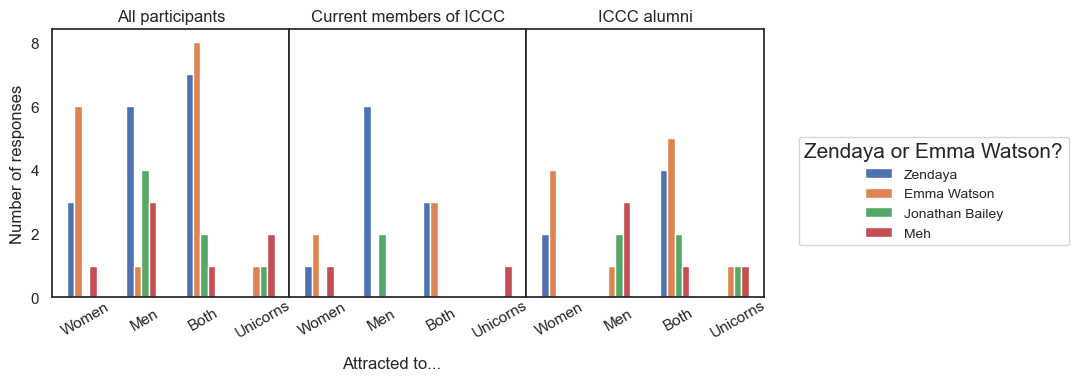

In [15]:
# set custom order for categorical data
order = ['Women', 'Men', 'Both', 'Unicorns']

# setup figure objects
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(8, 4))

# PLOT

# all data
data_to_plot = tabulate_data(df, 'Are you attracted to...', 'Zendaya or Emma Watson?')
(data_to_plot[['Options', 'Zendaya', 'Emma Watson', 'Jonathan Bailey', 'Meh']].set_index('Options').loc[order]
 .plot(kind='bar', ax=axs[0], legend=None, title='All participants', xlabel=''))

# current members data
data_to_plot = tabulate_data(df[df['Cohort'] == "Members"], 'Are you attracted to...', 'Zendaya or Emma Watson?')
(data_to_plot[['Options', 'Zendaya', 'Emma Watson', 'Jonathan Bailey', 'Meh']].set_index('Options').loc[order]
 .plot(kind='bar', ax=axs[1], legend=None, title='Current members of ICCC', xlabel=''))

# alumni data
data_to_plot = tabulate_data(df[df['Cohort'] == "Alumni"], 'Are you attracted to...', 'Zendaya or Emma Watson?')
(data_to_plot[['Options', 'Zendaya', 'Emma Watson', 'Jonathan Bailey', 'Meh']].set_index('Options').loc[order]
 .plot(kind='bar', ax=axs[2], legend=None, title='ICCC alumni', xlabel=''))

# FORMATTING

# format x-axis labels
axs[0].tick_params(axis='x', which='major', pad=5)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=30, ha='center', rotation_mode='anchor')

axs[1].tick_params(axis='x', which='major', pad=5)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=30, ha='center', rotation_mode='anchor')

axs[2].tick_params(axis='x', which='major', pad=5)
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=30, ha='center', rotation_mode='anchor')

# place legend
handles, labels = axs[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1,0.5), title='Zendaya or Emma Watson?', fontsize=10)
plt.rcParams['legend.title_fontsize'] = 10

# set axis titles
fig.supxlabel('Attracted to...', fontsize=12, y=0.05)
axs[0].set_ylabel('Number of responses', fontsize=12)

# adjust spacing
plt.tight_layout()
fig.subplots_adjust(wspace=0)

# save figure
fig.savefig('outputs/preference_by_attraction_and_cohort', bbox_inches='tight')

#### Effect of response time

C:\Users\maria\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maria\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maria\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


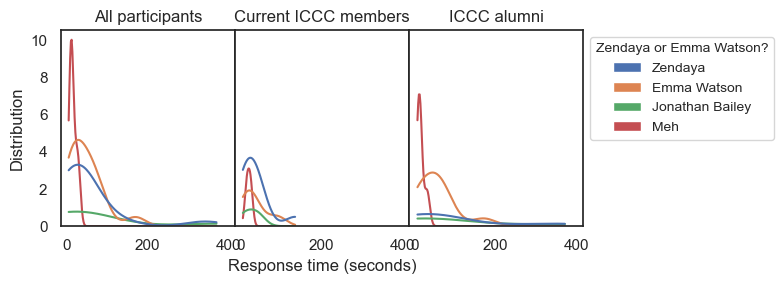

In [16]:
# set custom order for categorical data
order = ['Zendaya', 'Emma Watson', 'Jonathan Bailey', 'Meh']

# setup figure objects
fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(8,3))

# plot data
sns.histplot(x=df['Response time'], hue=df['Zendaya or Emma Watson?'],
             kde=True, hue_order=order, binwidth=30, alpha=0, ax=axs[0], legend=None)
sns.histplot(x=df[df['Cohort'] == 'Members']['Response time'], hue=df[df['Cohort'] == 'Members']['Zendaya or Emma Watson?'], 
             kde=True, hue_order=order, binwidth=30, alpha=0, ax=axs[1], legend=None)
g = sns.histplot(x=df[df['Cohort'] == 'Alumni']['Response time'], hue=df[df['Cohort'] == 'Alumni']['Zendaya or Emma Watson?'], 
             kde=True, hue_order=order, binwidth=30, alpha=0, ax=axs[2])

# format legend
for h in g.legend_.legend_handles: 
    h.set_alpha(1)

axs[2].legend(g.legend_.legend_handles, order, loc='upper left', bbox_to_anchor=(1,1), title='Zendaya or Emma Watson?', fontsize=10)
plt.rcParams['legend.title_fontsize'] = 10

# set titles and labels
axs[0].set_title('All participants')
axs[1].set_title('Current ICCC members')
axs[2].set_title('ICCC alumni')

axs[0].set_xlabel('')
axs[1].set_xlabel('Response time (seconds)', fontsize=12, y=0.05)
axs[2].set_xlabel('')

axs[0].set_ylabel('Distribution')
axs[1].set_ylabel('')
axs[2].set_ylabel('')

# adjust spacing
plt.tight_layout()
fig.subplots_adjust(wspace=0)

# save figure
fig.savefig('outputs/preference_response_time_by_cohort', bbox_inches='tight')